## Računalni vid: 3. laboratorijska vježba

### Zadatak 2: Okosnica

#### 2.1. Normalizacija ulazne slike i 2.2. Dopuna implementacije ResNeta

In [1]:
%cd cvunizg-lab3-faster-main
!python -m tests.test_backbone

C:\Users\Ivan\Desktop\VID\labosi\lab3\cvunizg-lab3-faster-main
Testing image normalization...
Image shape is correct!
Normalized image values are correct!

Testing backbone outputs...
Features res2 shape test: passed!
Features res2 values test: passed!
---------------------------------
Features res3 shape test: passed!
Features res3 values test: passed!
---------------------------------
Features res4 shape test: passed!
Features res4 values test: passed!
---------------------------------
Features res5 shape test: passed!
Features res5 values test: passed!
---------------------------------


#### 2.3. Kanali i značajke modela

Koliko kanala imaju izlazi iz pojedinog rezidualnog bloka? Značajke kojeg rezidualnog bloka su semantički najbogatije, a koje prostorno najpreciznije?

In [2]:
from resnet import resnet50
import torchvision
from torchvision.models.detection._utils import overwrite_eps
from PIL import Image
import torch
import numpy as np
from utils import normalize_img

model = resnet50(
    norm_layer=torchvision.ops.misc.FrozenBatchNorm2d
)
model.load_state_dict(torch.load('data/backbone_params.pth'))
model = model.eval()
overwrite_eps(model, 0.0)

img = Image.open('bb44.jpg')
img_pth = torch.from_numpy(np.array(img))
image_mean = torch.tensor([0.485, 0.456, 0.406])
image_std = torch.tensor([0.229, 0.224, 0.225])
img_pth = normalize_img(img_pth, image_mean, image_std)

out_dict = model(img_pth.unsqueeze(0))

for k in out_dict.keys():
    print(f'{k} shape : {out_dict[k].shape}')

res2 shape : torch.Size([1, 256, 160, 240])
res3 shape : torch.Size([1, 512, 80, 120])
res4 shape : torch.Size([1, 1024, 40, 60])
res5 shape : torch.Size([1, 2048, 20, 30])


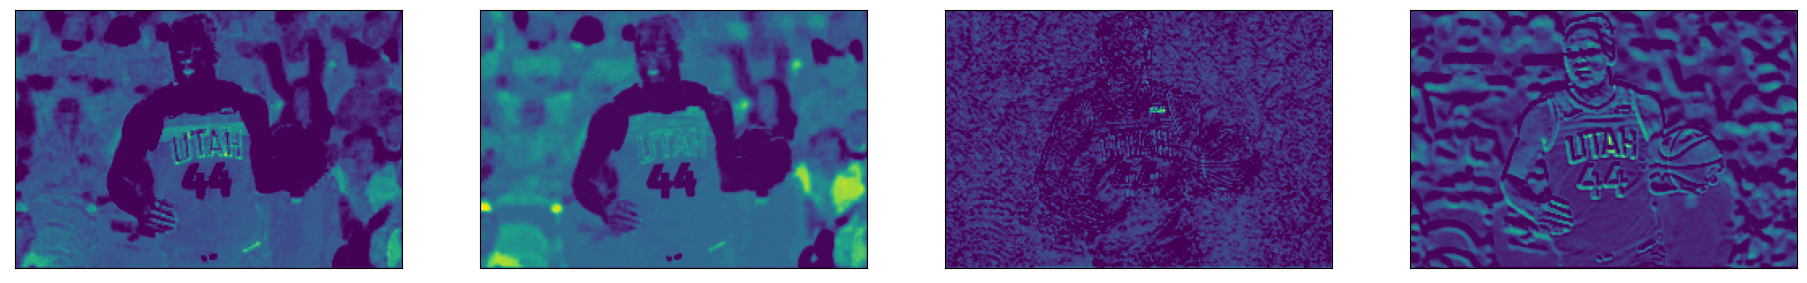

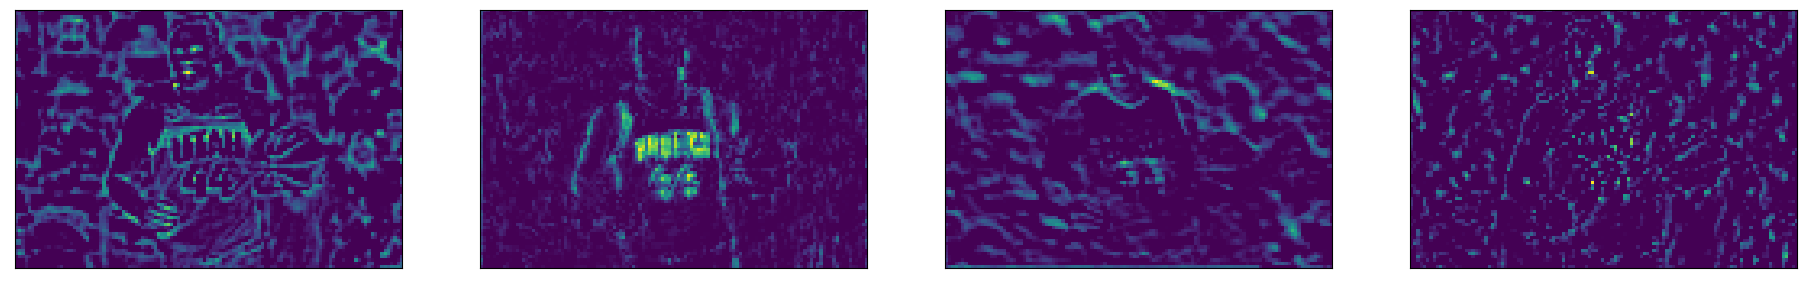

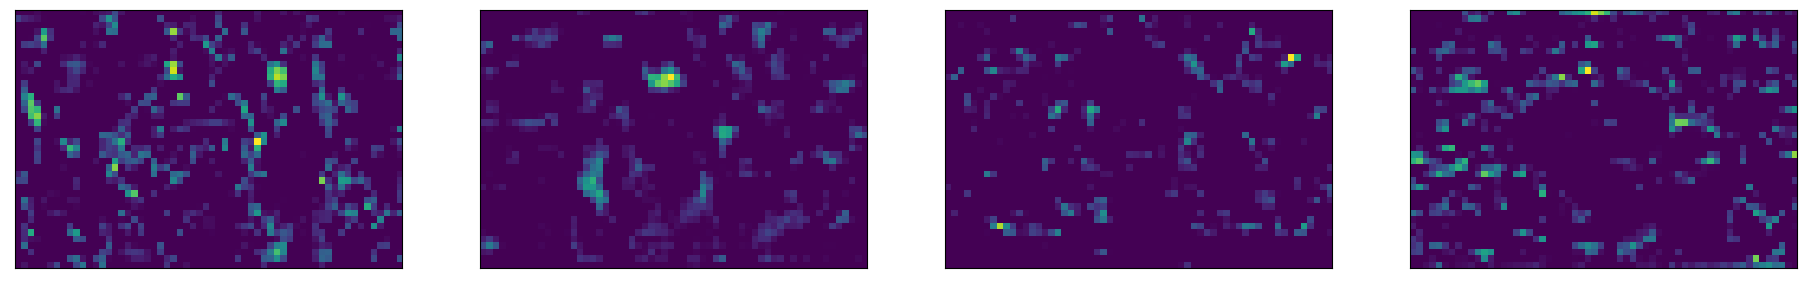

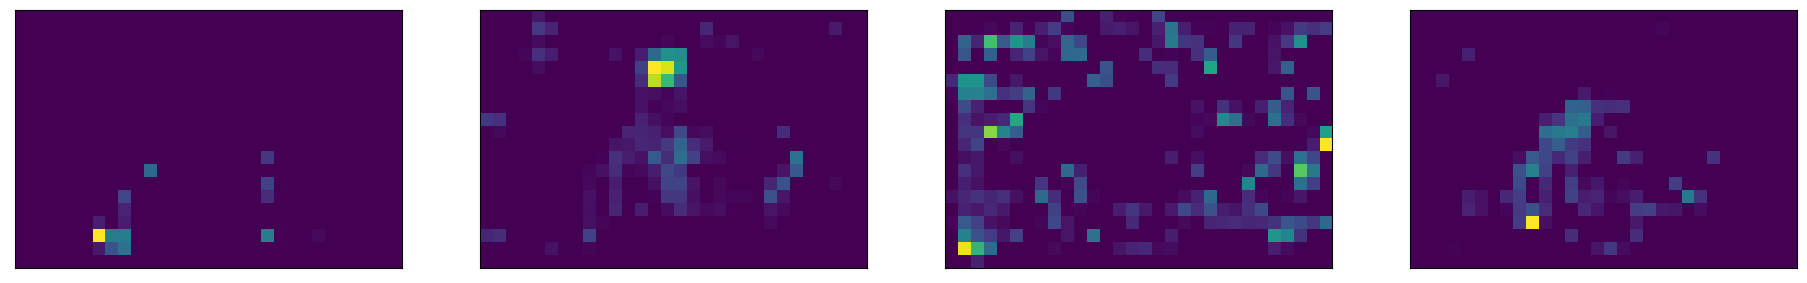

In [3]:
import matplotlib.pyplot as plt

def plot_4_features(out):
    num_plots = 4
    fig, axs = plt.subplots(1, num_plots, figsize=(23, 5))
    for k in range(num_plots):
        axs[k].imshow(out[0][k].detach().numpy())
        axs[k].set_xticks([])
        axs[k].set_yticks([])
    plt.show()

for k in out_dict.keys():
    plot_4_features(out_dict[k])

### Zadatak 3: Put za naduzorkovanje

#### 3.1. ConvNormActBlock, 3.2. FeaturePyramidNetwork i 3.3. testiranje implementacije

In [4]:
!python -m tests.test_fpn

Testing FPN outputs...
Features fpn2 shape test: passed!
Features fpn2 values test: passed!
---------------------------------
Features fpn3 shape test: passed!
Features fpn3 values test: passed!
---------------------------------
Features fpn4 shape test: passed!
Features fpn4 values test: passed!
---------------------------------
Features fpn5 shape test: passed!
Features fpn5 values test: passed!
---------------------------------
Features fpn_pool shape test: passed!
Features fpn_pool values test: passed!
---------------------------------


### Zadatak 4: Mreža za predlaganje regija od interesa (RPN)

#### 4.1. RPN klasifikator i regresor i 4.2 testiranje implementacije  

In [5]:
!python -m tests.test_decode_boxes

Testing box decoding...
Running simple test...
Test passed!


### Zadaci 5 i 6: Sažimanje po regijama (ROIPool) i semantička klasifikacija i fino ugađanje okvira

#### 6.1 Implementacija TwoMLPHead, 6.2 Implementacija FastRCNNPredictor, 6.3 Implementacija iscrtavanja i 6.4 testiranje implementacije

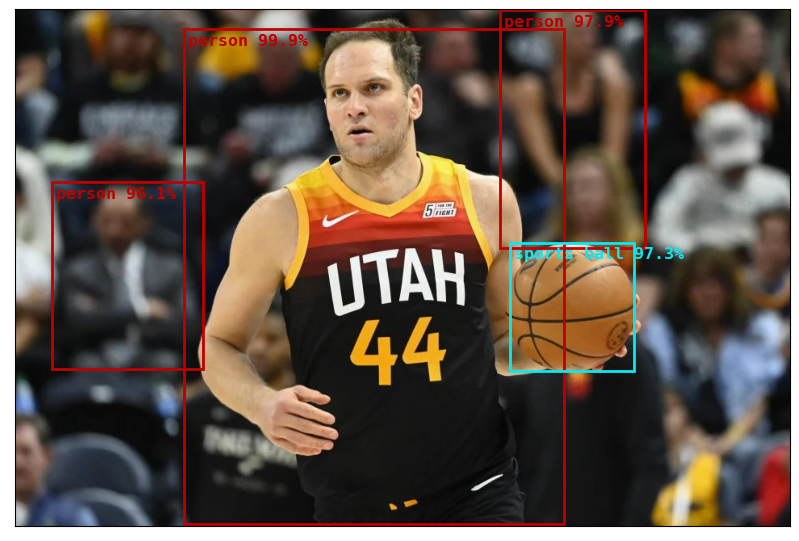

In [6]:
%run run_faster.py